<a href="https://colab.research.google.com/github/aryasovaalexandra/praktika/blob/main/labaaaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects

In [3]:
df = pd.read_csv('/content/crimes_against_women_2001-2014.csv')
df.head()

Unnamed: 0        STATE/UT       DISTRICT  Year  Rape  \
0           0  ANDHRA PRADESH       ADILABAD  2001    50   
1           1  ANDHRA PRADESH      ANANTAPUR  2001    23   
2           2  ANDHRA PRADESH       CHITTOOR  2001    27   
3           3  ANDHRA PRADESH       CUDDAPAH  2001    20   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001    23   

   Kidnapping and Abduction  Dowry Deaths  \
0                        30            16   
1                        30             7   
2                        34            14   
3                        20            17   
4                        26            12   

   Assault on women with intent to outrage her modesty  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   Importation of Girls  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [4]:
df = df.drop(columns = ['Unnamed: 0','STATE/UT','DISTRICT'])
df

Year  Rape  Kidnapping and Abduction  Dowry Deaths  \
0      2001    50                        30            16   
1      2001    23                        30             7   
2      2001    27                        34            14   
3      2001    20                        20            17   
4      2001    23                        26            12   
...     ...   ...                       ...           ...   
10672  2014     1                         0             0   
10673  2014     1                         0             0   
10674  2014     3                         1             0   
10675  2014     7                         6             1   
10676  2014    10                         7             1   

       Assault on women with intent to outrage her modesty  \
0                                                    149     
1                                                    118     
2                                                    112     
3                                                    126     
4                                                    109     
...                                                  ...     
10672                                                  1     
10673                                                  1     
10674                                                 12     
10675                                                 20     
10676                                                 32     

       Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                              34                                  175   
1                              24                                  154   
2                              83                                  186   
3                              38                                   57   
4                              58                                  247   
...                           ...                                  ...   
10672                           2                                    0   
10673                           2                                    0   
10674                           1                                    1   
10675                           7                                    3   
10676                           8                                    4   

       Importation of Girls  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
10672                     0  
10673                     0  
10674                     0  
10675                     0  
10676                     0  

[10677 rows x 8 columns]

In [5]:
from linearmodels.datasets import jobtraining
data = jobtraining.load()
year = pd.Categorical(data.year)
data = data.set_index(['year','fcode'])
data['year'] = year

In [6]:
exog_vars = ['grant', 'employ']
exog = sm.add_constant(data[exog_vars])
mod = RandomEffects(data.clscrap, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                clscrap   R-squared:                        0.0205
Estimator:              RandomEffects   R-squared (Between):             -0.5933
No. Observations:                 105   R-squared (Within):               0.0250
Date:                Wed, Nov 06 2024   R-squared (Overall):              0.0205
Time:                        09:14:07   Log-likelihood                   -91.226
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.0653
Entities:                           2   P-value                           0.3484
Avg Obs:                       52.500   Distribution:                   F(2,102)
Min Obs:                       52.000                                           
Max Obs:                       53.000   F-statistic (robust):             1.0653
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [7]:
mod = PanelOLS(data.clscrap, exog)

re_res = mod.fit()

print(re_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                clscrap   R-squared:                        0.0205
Estimator:                   PanelOLS   R-squared (Between):             -0.5933
No. Observations:                 105   R-squared (Within):               0.0250
Date:                Wed, Nov 06 2024   R-squared (Overall):              0.0205
Time:                        09:14:11   Log-likelihood                   -91.226
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.0653
Entities:                           2   P-value                           0.3484
Avg Obs:                       52.500   Distribution:                   F(2,102)
Min Obs:                       52.000                                           
Max Obs:                       53.000   F-statistic (robust):             1.0653
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Теперь мы создаем объект линейной регрессии с фиксированными эффектами (Fixed Effects OLS):

smf.ols: Используем функцию ols из библиотеки statsmodels.formula.api для создания линейной регрессионной модели.
  
formula='clscrap ~ 1 + grant + employ + C(fcode)': Определяет формулу для регрессии. Здесь:
  clscrap — зависимая переменная,
  ~ 1 указывает на то, что у нас есть свободный член (константа),
  grant и employ — независимые переменные,
  C(fcode) — факторная переменная, где C означает, что fcode будет считаться категориальной переменной.

data=data: Указывает, какие данные использовать для моделирования
fit(): Выполняет оценку модели методом наименьших квадратов.

In [8]:
data = jobtraining.load()
data['year'] = pd.Categorical(data.year)
FE_ols = smf.ols(formula='clscrap ~ 1 + grant + employ + C(fcode)', data = data).fit()
print(FE_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                clscrap   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1.577
Date:                Wed, 06 Nov 2024   Prob (F-statistic):             0.0529
Time:                        09:14:17   Log-Likelihood:                -40.109
No. Observations:                 105   AIC:                             190.2
Df Residuals:                      50   BIC:                             336.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0558      0

In [9]:
Y = df['Rape']
X = df[['Kidnapping and Abduction','Dowry Deaths','Insult to modesty of Women']]
model = sm.OLS(df['Rape'], X).fit()
#создание и оценка линейной регрессионной модели с использованием метода наименьших квадратов (Ordinary Least Squares, OLS)
# Выводим результаты
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Rape   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              6823.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:16:12   Log-Likelihood:                         -67115.
No. Observations:               10677   AIC:                                  1.342e+05
Df Residuals:                   10674   BIC:                                  1.343e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [10]:
pd.set_option('display.max_rows', None)
#отображалось максимальное количество строк без ограничения
df

Year  Rape  Kidnapping and Abduction  Dowry Deaths  \
0      2001    50                        30            16   
1      2001    23                        30             7   
2      2001    27                        34            14   
3      2001    20                        20            17   
4      2001    23                        26            12   
5      2001     0                         0             0   
6      2001    54                        51             7   
7      2001    37                        39            24   
8      2001    56                        49            62   
9      2001    47                        30            17   
10     2001    37                        21            10   
11     2001    29                        47            13   
12     2001    59                        27            14   
13     2001    35                        20            26   
14     2001    35                        19            31   
15     2001    46                        80            10   
16     2001    21                        21            19   
17     2001    19                        12             5   
18     2001    72                        83            37   
19     2001     0                         0             1   
20     2001     8                        12             6   
21     2001    25                        48             2   
22     2001     1                         0             0   
23     2001    12                        12             3   
24     2001    13                         6             0   
25     2001     8                         2             0   
26     2001    53                        25            52   
27     2001    61                        21            15   
28     2001   871                       765           420   
29     2001     1                         2             0   
30     2001     2                         4             0   
31     2001     2                         5             0   
32     2001     0                         2             0   
33     2001     2                         6             0   
34     2001     9                         5             0   
35     2001     5                         7             0   
36     2001     2                         5             0   
37     2001     4                        10             0   
38     2001     2                         5             0   
39     2001     2                         1             0   
40     2001     1                         0             0   
41     2001     1                         3             0   
42     2001    33                        55             0   
43     2001    28                        88            10   
44     2001    20                        21             1   
45     2001     0                         0             0   
46     2001    45                        74             7   
47     2001    48                        47             9   
48     2001    42                        20             0   
49     2001    43                        51             5   
50     2001    35                        37             3   
51     2001     1                         0             0   
52     2001    35                        35             1   
53     2001    30                        40             0   
54     2001    37                        64             5   
55     2001    24                        34             2   
56     2001    42                        28             2   
57     2001    21                        65             2   
58     2001     5                        15             4   
59     2001    33                         8             1   
60     2001    14                        12             0   
61     2001    64                        62             0   
62     2001    23                        37             0   
63     2001     2                         4             0   
64     2001    51                       10

                                 OLS Regression Results                                
Dep. Variable:                   Rape   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.605
Method:                 Least Squares   F-statistic:                          1.636e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:17:24   Log-Likelihood:                         -67872.
No. Observations:               10677   AIC:                                  1.357e+05
Df Residuals:                   10676   BIC:                                  1.358e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

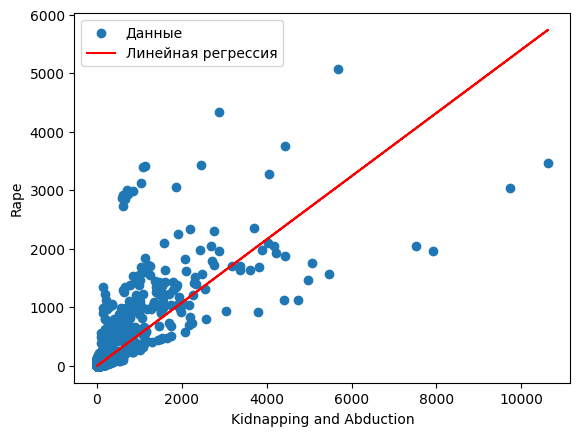

In [11]:
#однонаправленный
Y = df['Rape']
X = df['Kidnapping and Abduction']
model = sm.OLS(df['Rape'], X).fit()

# Выводим результаты
print(model.summary())

# Строим график
plt.scatter(df['Kidnapping and Abduction'], df['Rape'], label='Данные')
plt.plot(df['Kidnapping and Abduction'], model.predict(X), color='red', label='Линейная регрессия')
plt.xlabel('Kidnapping and Abduction')
plt.ylabel('Rape')
plt.legend()
plt.show()

In [13]:
#двунаправленный
X1 = sm.add_constant(df['Kidnapping and Abduction'])
model1 = sm.OLS(df['Rape'], X1).fit()
print("Результаты регрессии Y ~ X:")
print(model1.summary())

# Модель 2: X зависит от Y
Y1 = sm.add_constant(df['Rape'])
model2 = sm.OLS(df['Kidnapping and Abduction'], Y1).fit()
print("\nРезультаты регрессии X ~ Y:")
print(model2.summary())

Результаты регрессии Y ~ X:
                            OLS Regression Results                            
Dep. Variable:                   Rape   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                 1.508e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:17:53   Log-Likelihood:                -67753.
No. Observations:               10677   AIC:                         1.355e+05
Df Residuals:                   10675   BIC:                         1.355e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [14]:
#сквозной
import numpy as np
import statsmodels.api as sm
Y = df['Rape']
X = df['Kidnapping and Abduction']
np.random.seed(0)
n = 100

model = sm.OLS(Y, X).fit()

# Выводим результаты
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Rape   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.605
Method:                 Least Squares   F-statistic:                          1.636e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:18:13   Log-Likelihood:                         -67872.
No. Observations:               10677   AIC:                                  1.357e+05
Df Residuals:                   10676   BIC:                                  1.358e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Коэффициент: 0.5339840250616334
Свободный член: 19.934328911462295


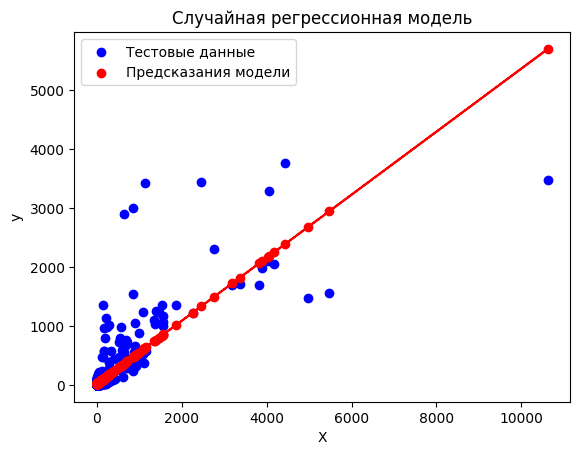

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df[['Kidnapping and Abduction']], df['Rape'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вывод коэффициентов модели
print(f'Коэффициент: {model.coef_[0]}')
print(f'Свободный член: {model.intercept_}')
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные')
plt.scatter(X_test, y_pred, color='red', label='Предсказания модели')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Случайная регрессионная модель')
plt.legend()
plt.show()